# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=176f118ce31f11ebd0ee41ee49f6eeb4e60e5ec3ac6facb46c2f4a84c1240a4c
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU *NOT* available. Will use CPU (slow)
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


In [3]:
!pip install pytest

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from torchsummary import summary

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [4]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 17.44s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

### For the first Transfer Model: resnet18

In [4]:
batch_size = 128       # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 20        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.2   
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'Adam'           # optimizer. 'sgd' or 'adam'
weight_decay = 0.01    # regularization. Increase this to combat overfitting
momentum = 0.97

In [16]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer1 = get_model_transfer_learning(model_name="resnet18", n_classes = num_classes, dropout = dropout)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size, valid_size = valid_size)

print(summary(model_transfer1.cuda(), (3,224,224)))

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]      

In [17]:
print(model_transfer1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

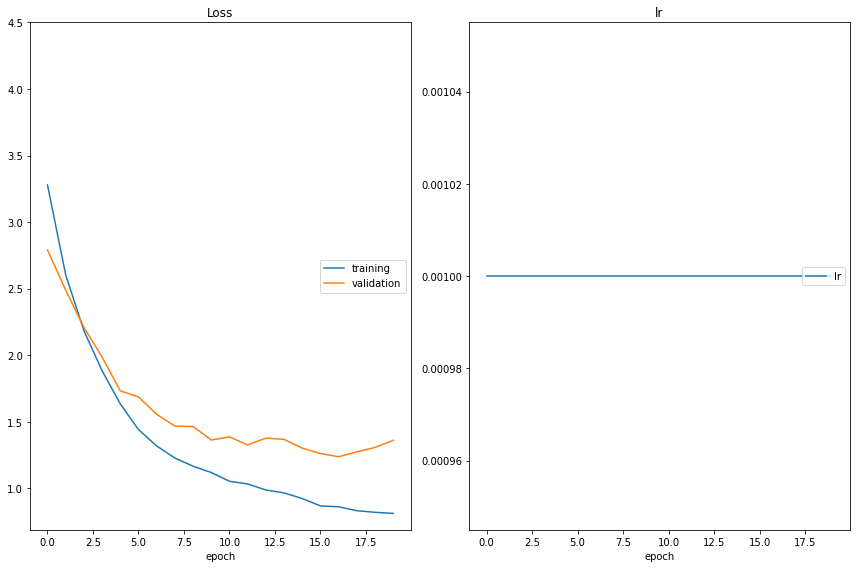

In [18]:
optimizer = get_optimizer(
    model_transfer1,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer1,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer1.pt",
    interactive_tracking=True
)

### For the second Transfer Model: vgg16

In [10]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer2 = get_model_transfer_learning(model_name="vgg16", n_classes = num_classes, dropout = dropout)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size, valid_size = valid_size)

print(summary(model_transfer2.cuda(), (3,224,224)))

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]      

In [11]:
print(model_transfer2)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

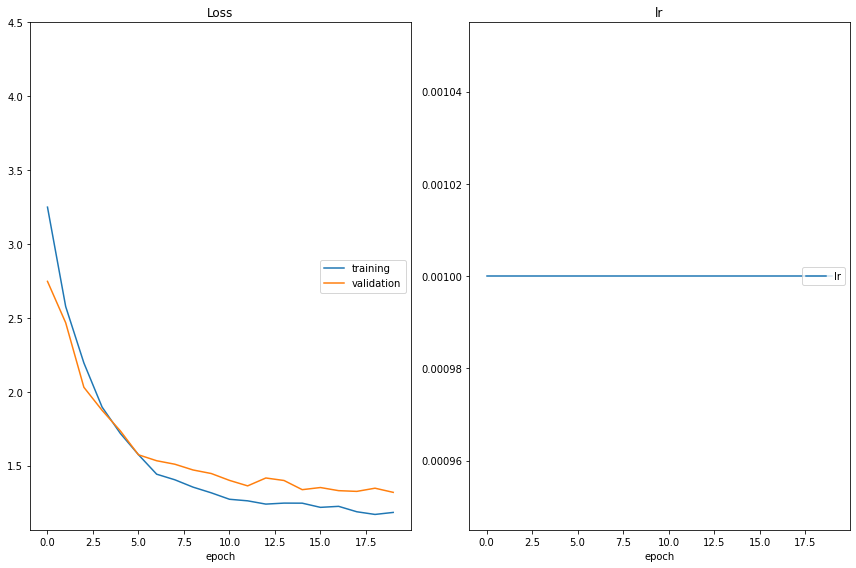

In [12]:
optimizer = get_optimizer(
    model_transfer2,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer2,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer2.pt",
    interactive_tracking=True
)

### For the third Transfer Model: efficientnet_b0

In [3]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer3 = get_model_transfer_learning(model_name="efficientnet_b0", n_classes = num_classes, dropout = dropout)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size, valid_size = valid_size)

print(summary(model_transfer3.cuda(), (3,224,224)))

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]      

In [4]:
print(model_transfer3)

EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation(
 

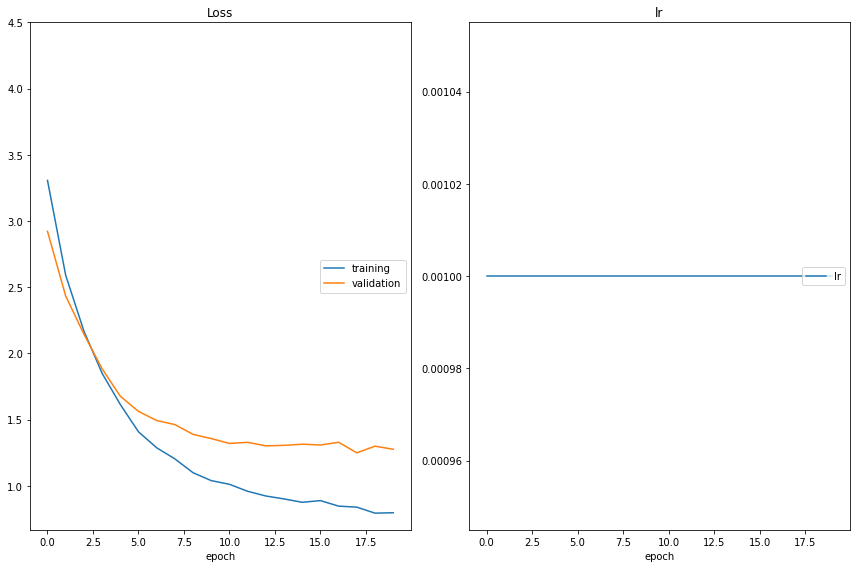

In [5]:
optimizer = get_optimizer(
    model_transfer3,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer3,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer3.pt",
    interactive_tracking=True
)

### For the fourth Transfer Model: mobilenet_v2

In [3]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer4 = get_model_transfer_learning(model_name="mobilenet_v2", n_classes = num_classes, dropout = dropout)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size, valid_size = valid_size)

print(summary(model_transfer4.cuda(), (3,224,224)))

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]      

In [4]:
print(model_transfer4)

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

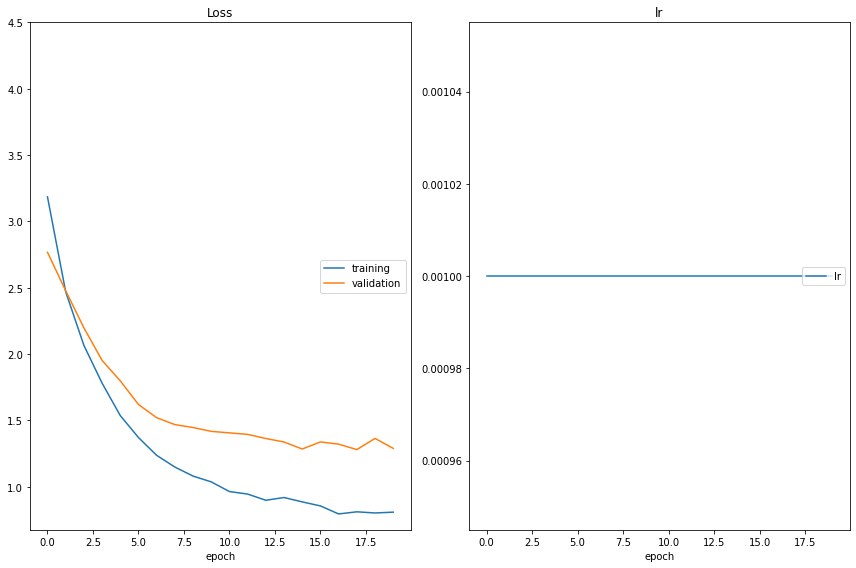

In [5]:
optimizer = get_optimizer(
    model_transfer4,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer4,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer4.pt",
    interactive_tracking=True
)

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ 

I tried with four different pretrained models: ResNet18, VGG16, EfficientNet_b0, and MobileNet_v2 for the base of my model, since all of them perform fairly well on ImageNet dataset, which also uses natural scenes like our Landmark Dataset. Each of these individual models gave a test accuracy in the range 68-73%. So, I decided implementing a simple weighted sum ensemble so that the test accuracy could further be increased. The optimized weights were computed using a grid search technique.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

### Test Results for the first Transfer Model: resnet18

In [21]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer1.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]

Test Loss: 1.139791


Test Accuracy: 73% (919/1250)


1.1397908329963682

### Test Results for the second Transfer Model: vgg16

In [13]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("vgg16", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer2.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 10/10 [00:20<00:00,  2.02s/it]

Test Loss: 1.221029


Test Accuracy: 68% (859/1250)


1.221028882265091

### Test Results for the third Transfer Model: efficientnet_b0

In [6]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("efficientnet_b0", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer3.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 10/10 [00:17<00:00,  1.77s/it]

Test Loss: 1.151162


Test Accuracy: 72% (906/1250)


1.1511620402336118

### Test Results for the fourth Transfer Model: mobilenet_v2

In [6]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("mobilenet_v2", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer4.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 10/10 [00:17<00:00,  1.77s/it]

Test Loss: 1.120414


Test Accuracy: 72% (905/1250)


1.120414209365845

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

### For the first Transfer Model: resnet18

In [22]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer1.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/resnet18.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [05:06<00:00,  4.08it/s]


Accuracy: 0.7208


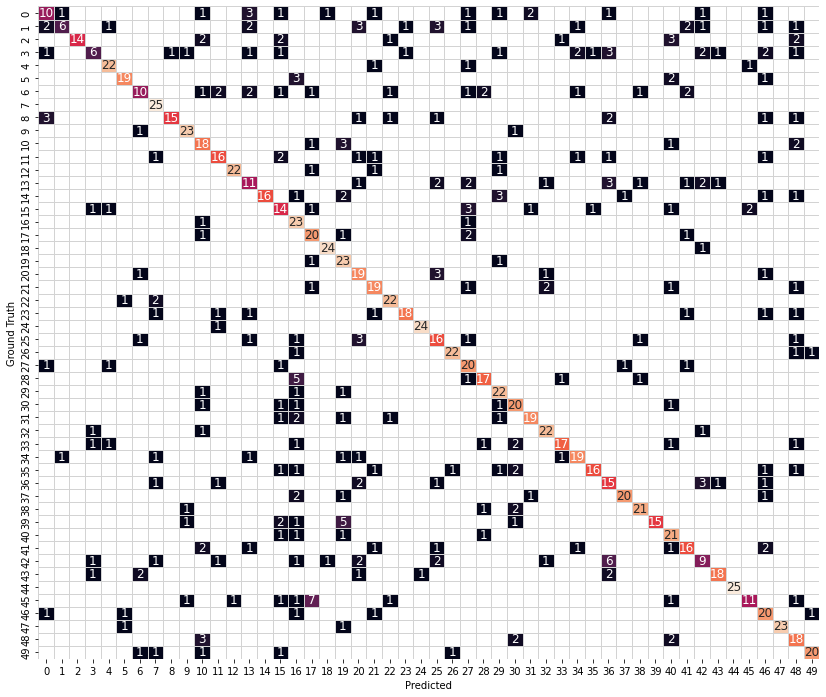

In [4]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/resnet18.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

### For the second Transfer Model: vgg16

In [14]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer2.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/vgg16.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [21:15<00:00,  1.02s/it]


Accuracy: 0.6848


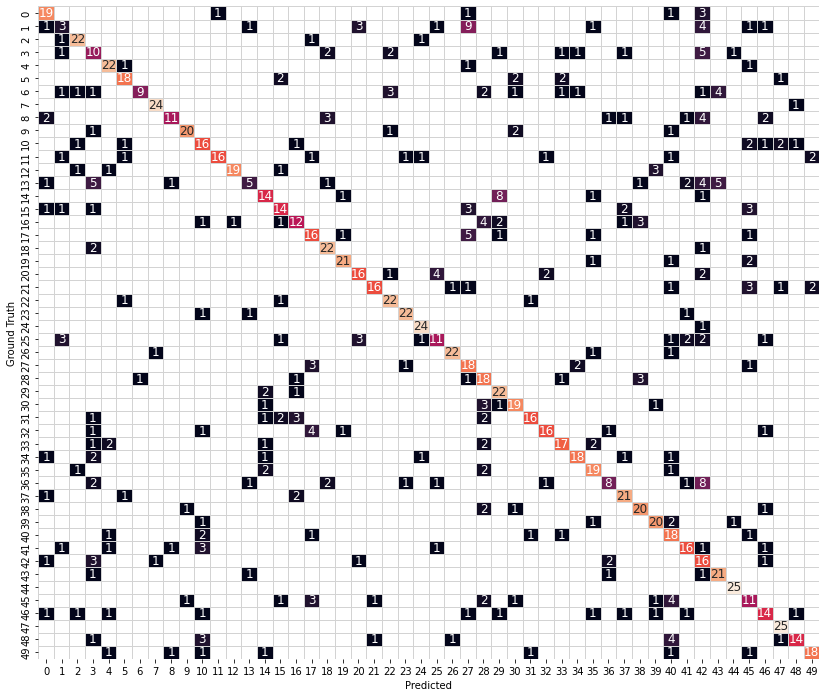

In [5]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/vgg16.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

### For the third Transfer Model: efficientnet_b0

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer3.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/efficientnet_b0.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [05:08<00:00,  4.05it/s]


Accuracy: 0.7216


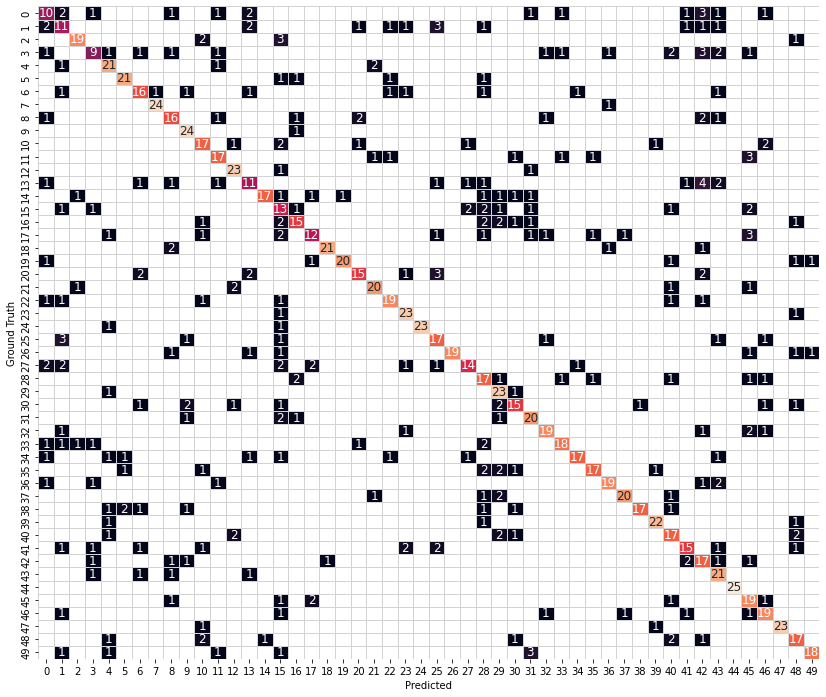

In [7]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/efficientnet_b0.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

### For the fourth Transfer Model: mobilenet_v2

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer4.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/mobilenet_v2.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [05:49<00:00,  3.58it/s]


Accuracy: 0.7128


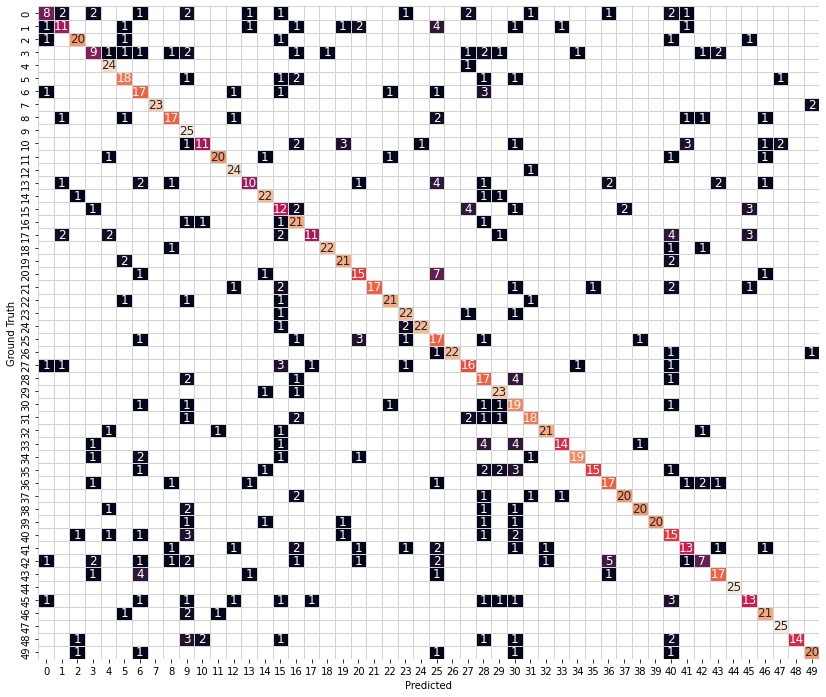

In [8]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/mobilenet_v2.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

## Step 5: Implementing a Weighted Sum Ensemble to improve test performance

In [1]:
import os

import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm
from torchvision import datasets
import torchvision.transforms as T
from src.helpers import get_data_location



def predictor_func(test_dataloader, model_reloaded):
    """
    Test the predictor. Since the predictor does not operate on the same tensors
    as the non-wrapped model, we need a specific test function (can't use one_epoch_test)
    """

    folder = get_data_location()
    test_data = datasets.ImageFolder(os.path.join(folder, "test"), transform=T.ToTensor())

    pred = []
    truth = []
    for x in tqdm(test_data, total=len(test_dataloader.dataset), leave=True, ncols=80):
        softmax = model_reloaded(x[0].unsqueeze(dim=0))
        truth.append(int(x[1]))
        pred.append(softmax)

    pred = np.array(pred)
    truth = np.array(truth)

    return truth, pred

In [2]:
model_reloaded1 = torch.jit.load("checkpoints/resnet18.pt")
model_reloaded2 = torch.jit.load("checkpoints/vgg16.pt")
model_reloaded3 = torch.jit.load("checkpoints/efficientnet_b0.pt")
model_reloaded4 = torch.jit.load("checkpoints/mobilenet_v2.pt")

In [4]:
truth1, pred1 = predictor_func(data_loaders['test'], model_reloaded1)
truth2, pred2 = predictor_func(data_loaders['test'], model_reloaded2)
truth3, pred3 = predictor_func(data_loaders['test'], model_reloaded3)
truth4, pred4 = predictor_func(data_loaders['test'], model_reloaded4)

100%|███████████████████████████████████████| 1250/1250 [05:44<00:00,  3.62it/s]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
100%|███████████████████████████████████████| 1250/1250 [03:51<00:00,

In [5]:
for i in range(len(pred1)):
    pred1[i] = np.array(pred1[i][0])
    
for i in range(len(pred2)):
    pred2[i] = np.array(pred2[i][0])
    
for i in range(len(pred3)):
    pred3[i] = np.array(pred3[i][0])
    
for i in range(len(pred4)):
    pred4[i] = np.array(pred4[i][0])

### Checking for an assumed set of weights

In [8]:
ensemble_predictions = []
weight1 = 0.3
weight2 = 0.1
weight3 = 0.3
weight4 = 0.3


for i in range(len(truth1)):
    li = []
    for j in range(len(pred1[0])):
        li.append(pred1[i][j] * weight1 + pred2[i][j] * weight2 + pred3[i][j] * weight3 + pred4[i][j] * weight4)
    ensemble_predictions.append(li)
    
ensemble_predictions = np.argmax(ensemble_predictions, axis=1)
print(f"Accuracy: {(ensemble_predictions==truth1).sum() / len(truth1)}")

Accuracy: 0.8008


### Implementing a Grid Search to find optimal weights

In [6]:
weight_range = np.linspace(0, 1, 26)  # Search weights between 0 and 1

best_weights = None
best_accuracy = 0.0

#n = 1
for weight1 in weight_range:
    for weight2 in weight_range:
        for weight3 in weight_range:
            for weight4 in weight_range:
                if weight1 + weight2 + weight3 + weight4 == 1.0: 
                    ensemble_predictions = []
                    for i in range(len(truth1)):
                        li = []
                        for j in range(len(pred1[0])):
                            li.append(pred1[i][j] * weight1 + pred2[i][j] * weight2 + pred3[i][j] * weight3 + pred4[i][j] * weight4)
                        ensemble_predictions.append(li)
                
                    ensemble_predictions = np.argmax(ensemble_predictions, axis=1)

                    accuracy = (ensemble_predictions==truth1).sum() / len(truth1)
            
                    #print("Step {}:".format(n))
                    #print("Weight resnet18: ", weight1, " Weight vgg16: ", weight2, "Weight efficientnet_b0: ", weight3, " Weight mobilenet_v2: ", weight4,"Ensemble Accuracy: ", accuracy)
                    #print()
            
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_weights = (weight1, weight2, weight3, weight4)
                
                
                    #n+=1


print("Best Weights (resnet18, vgg16, efficientnet_b0, mobilenet_v2):", best_weights[0], best_weights[1], best_weights[2], best_weights[3])

Best Weights (resnet18, vgg16, efficientnet_b0, mobilenet_v2): 0.2 0.28 0.24 0.28


### Implementing the optimised ensemble

In [7]:
ensemble_predictions = []
weight1 = best_weights[0]
weight2 = best_weights[1]
weight3 = best_weights[2]
weight4 = best_weights[3]


for i in range(len(truth1)):
    li = []
    for j in range(len(pred1[0])):
        li.append(pred1[i][j] * weight1 + pred2[i][j] * weight2 + pred3[i][j] * weight3 + pred4[i][j] * weight4)
    ensemble_predictions.append(li)
    
ensemble_predictions = np.argmax(ensemble_predictions, axis=1)
print(f"Optimized Ensemble Accuracy: {(ensemble_predictions==truth1).sum() / len(truth1)}")

Optimized Ensemble Accuracy: 0.816
